In [ ]:
# Extract Tweet of a Specific person :

#https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html

In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [2]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "gY9Sa0lMKNEQ8oe2IGflF2DEy"
consumer_secret = "ESNh3fPZPoB8Ztar47zsTHiMrdrQ6iavOpVB8jl2LuEDKTyUlM" 
access_token = "1593954108318285831-izGEQO1nAnyoUCoLzOvBKJgIzQDIT7"
access_token_secret = "E9boSeTPvkcIWfQZyEGrokA6A9xZJJLiXLIV0Hroexehs"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [3]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
# We will use api as api.search inside this tweepy cursor.

In [4]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [41]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["moroccofifa"]
get_tweets(Topic , Count=1000)

In [42]:
df.head(20)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-10 21:52:23,yohan,False,@jinspillthetae @Mohaas10Messi All I'm saying ...,0,0,,all i m saying is you need a speedster to stop...,Neutral
1,2022-12-10 21:52:17,Dani-x 👁,False,@ESPNFC Hakimi watching clips of Mbappe outrun...,0,0,In your Head,hakimi watching clips of mbappe outrunning wal...,Neutral
2,2022-12-10 21:52:15,mery 🇲🇦,False,hakimi vs mbappe is gonna be so weird like tha...,0,0,"5hinee, ggs & omar ♡",hakimi vs mbappe is gonna be so weird like tha...,Negative
3,2022-12-10 21:52:08,ⵣ🇲🇦🇵🇸,False,hakimi and mbappe soon https://t.co/6KQqIwgBdo,2,0,"ash, they/she, NO FEMALE TERMS",hakimi and mbappe soon,Neutral
4,2022-12-10 21:51:53,azoo🤏🇱🇷,False,Hakimi is ready to meet Mbappe in the semifina...,1,0,"Mississippi, USA",hakimi is ready to meet mbappe in the semifinals,Positive
5,2022-12-10 21:51:50,trenton 🔫🦂🇦🇷,False,@AchrafHakimi @KMbappe HAKIMI VS MBAPPE.\n\nI'...,0,0,turn notifications on,hakimi vs mbappe i ll love it and i think i de...,Positive
6,2022-12-10 21:51:45,Girl (World Cup era ⚽️),False,They got my heart but Hakimi needs to take it ...,0,0,Caribbean,they got my heart but hakimi needs to take it,Neutral
7,2022-12-10 21:51:43,indibad,False,"@433 ⚡️Urgent, the referee of the Morocco-Fran...",1,0,,urgent the referee of the morocco france match...,Negative
8,2022-12-10 21:51:34,Alex,False,@AchrafHakimi hakimi me come,0,0,,hakimi me come,Neutral
9,2022-12-10 21:51:29,23 Savage,False,@psg_boise Do you think if Morocco win the Wor...,0,0,"Paris, France",boise do you think if morocco win the world cu...,Positive


# Analyze the tweets

In [43]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [44]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [45]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [46]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-10 21:52:23,yohan,False,@jinspillthetae @Mohaas10Messi All I'm saying ...,0,0,,all i m saying is you need a speedster to stop...,Neutral
1,2022-12-10 21:52:17,Dani-x 👁,False,@ESPNFC Hakimi watching clips of Mbappe outrun...,0,0,In your Head,hakimi watching clips of mbappe outrunning wal...,Neutral
2,2022-12-10 21:52:15,mery 🇲🇦,False,hakimi vs mbappe is gonna be so weird like tha...,0,0,"5hinee, ggs & omar ♡",hakimi vs mbappe is gonna be so weird like tha...,Negative
3,2022-12-10 21:52:08,ⵣ🇲🇦🇵🇸,False,hakimi and mbappe soon https://t.co/6KQqIwgBdo,2,0,"ash, they/she, NO FEMALE TERMS",hakimi and mbappe soon,Neutral
4,2022-12-10 21:51:53,azoo🤏🇱🇷,False,Hakimi is ready to meet Mbappe in the semifina...,1,0,"Mississippi, USA",hakimi is ready to meet mbappe in the semifinals,Positive


In [47]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-10 21:52:23,yohan,False,@jinspillthetae @Mohaas10Messi All I'm saying ...,0,0,,all i m saying is you need a speedster to stop...,Neutral
1,2022-12-10 21:52:17,Dani-x 👁,False,@ESPNFC Hakimi watching clips of Mbappe outrun...,0,0,In your Head,hakimi watching clips of mbappe outrunning wal...,Neutral
2,2022-12-10 21:52:15,mery 🇲🇦,False,hakimi vs mbappe is gonna be so weird like tha...,0,0,"5hinee, ggs & omar ♡",hakimi vs mbappe is gonna be so weird like tha...,Negative
3,2022-12-10 21:52:08,ⵣ🇲🇦🇵🇸,False,hakimi and mbappe soon https://t.co/6KQqIwgBdo,2,0,"ash, they/she, NO FEMALE TERMS",hakimi and mbappe soon,Neutral
4,2022-12-10 21:51:53,azoo🤏🇱🇷,False,Hakimi is ready to meet Mbappe in the semifina...,1,0,"Mississippi, USA",hakimi is ready to meet mbappe in the semifinals,Positive


In [48]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Mbappe &amp; Hakimi are on their mini friends to enemies arc

Clean tweet:
 mbappe amp hakimi are on their mini friends to enemies arc

Sentiment of the tweet:
 Neutral


In [49]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['moroccofifa'] are : 101
Total Positive Tweets are : 34
Total Negative Tweets are : 9
Total Neutral Tweets are : 58


In [50]:
df["Sentiment"].value_counts()

Neutral     58
Positive    34
Negative     9
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

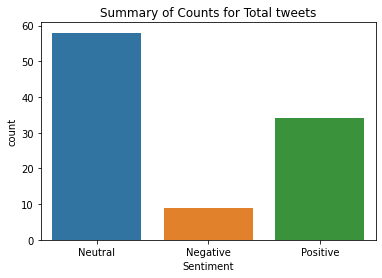

In [51]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


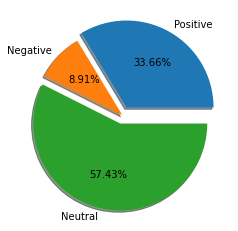

In [52]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

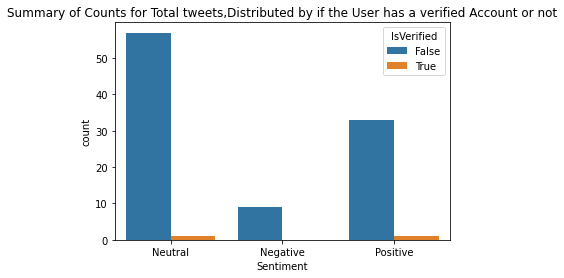

In [53]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

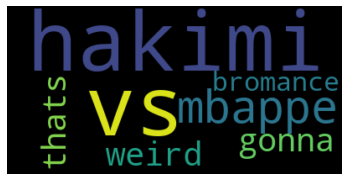

In [55]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 5808 words in the combination of all review.


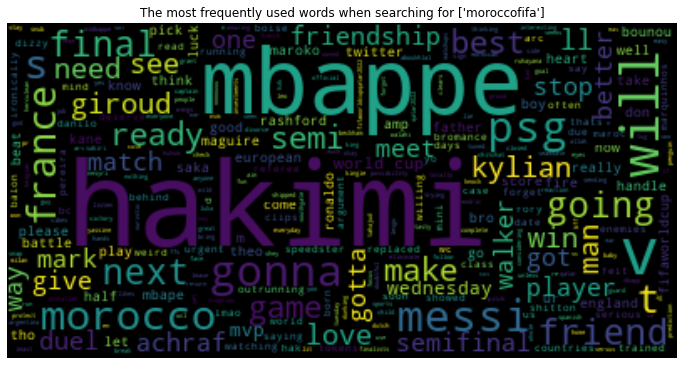

In [56]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

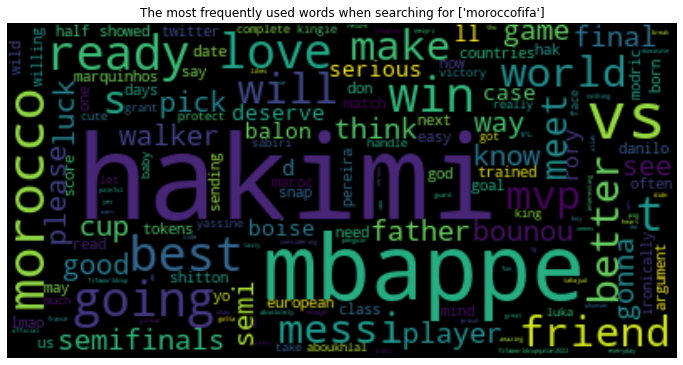

In [57]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 5808 words in the combination of all review.


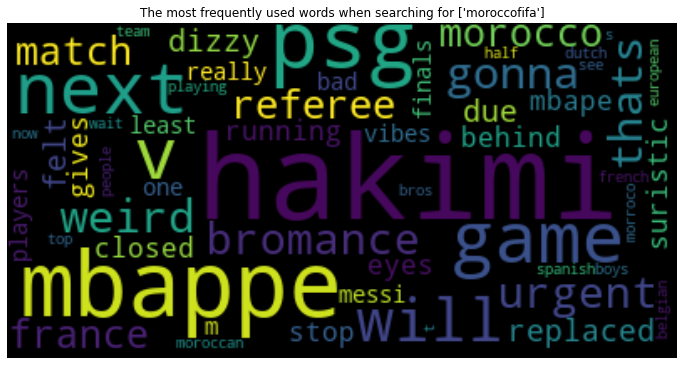

In [58]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()

In [59]:
import pickle

with open('./model.pickle', 'wb') as f:
    pickle.dump(df, f)

    f.close()

In [60]:
f = open('./model.pickle', 'rb')
# dump information to that file
data =pickle.load(f)

In [64]:
data

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-10 21:52:23,yohan,False,@jinspillthetae @Mohaas10Messi All I'm saying ...,0,0,,all i m saying is you need a speedster to stop...,Neutral
1,2022-12-10 21:52:17,Dani-x 👁,False,@ESPNFC Hakimi watching clips of Mbappe outrun...,0,0,In your Head,hakimi watching clips of mbappe outrunning wal...,Neutral
2,2022-12-10 21:52:15,mery 🇲🇦,False,hakimi vs mbappe is gonna be so weird like tha...,0,0,"5hinee, ggs & omar ♡",hakimi vs mbappe is gonna be so weird like tha...,Negative
3,2022-12-10 21:52:08,ⵣ🇲🇦🇵🇸,False,hakimi and mbappe soon https://t.co/6KQqIwgBdo,2,0,"ash, they/she, NO FEMALE TERMS",hakimi and mbappe soon,Neutral
4,2022-12-10 21:51:53,azoo🤏🇱🇷,False,Hakimi is ready to meet Mbappe in the semifina...,1,0,"Mississippi, USA",hakimi is ready to meet mbappe in the semifinals,Positive
...,...,...,...,...,...,...,...,...,...
96,2022-12-10 21:42:11,Señor🎩,False,@ChumaNnoli Hakimi? Come on fam,0,0,"Lagos, Nigeria",hakimi come on fam,Neutral
97,2022-12-10 21:42:04,𓆩mia𓆪,False,@JGGK1ST Whoever plays better will win\nI didn...,0,0,•shippers dnfi• I|black|I,whoever plays better will win i didn t want to...,Positive
98,2022-12-10 21:42:01,Dewi Sri Asih,False,Ronaldo Kane Maroko Mbappe Maguire Beckam Tott...,0,0,Indonesia,ronaldo kane maroko mbappe maguire beckam tott...,Neutral
99,2022-12-10 21:42:00,nah,False,mbappe will see to it that hakimi never wears ...,7,1,,mbappe will see to it that hakimi never wears ...,Neutral
